# Майнор Интеллектуальный анализ данных / Введение в анализ данных

## Домашнее задание 3. Логистическая регрессия и случайный лес.

В этом задании вам предстоит:
- поработать с логистической регрессией (полная реализация не потребуется, однако можно заработать бонусные баллы)
- воспроизвести подход случайного леса через одно решающее дерево, поэкспериментировать со случайным лесом.

На все вопросы требуется отвечать развёрнуто, аппелируя к полученным значениям или графикам, ответы вписывать в отдельную ячейку, выбрав для неё тип "Markdown". От полноты и качества ответов будет во многом зависеть ваша итоговая оценка.

Задание выполняется самостоятельно, плагиат будет стандартно наказываться лишением всех баллов за задание.
- Максимальная оценка за задание: 10 баллов.
- Дата выдачи: 28.04.2018
- Срок сдачи: 23:59 18.05.2018

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


## Часть 0. Подготовка данных.

Для наших экспериентов возьмём обучающую выборку [отсюда](https://www.kaggle.com/iabhishekofficial/mobile-price-classification).

In [76]:
train = pd.read_csv('train.csv')

Решается задача многоклассовой классификации — определение ценовой категории телефона. Для простоты перейдём к задаче бинарной классификации — пусть исходные классы 0 и 1 соответствуют классу 0 новой целевой переменной, а остальные классу 1.

Замените целевую переменную, отделите её в отдельную переменную и удалите из исходной выборки.

In [77]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
def binary_changer(number):
    if number==0 or number==1:
        number=0
    else:
        number=1
    return number
#binary_changer(3)
binary=[]
for p in train['price_range']:
    newp=binary_changer(p)
    #print(str(p) + ' is now ' + str(newp))
    binary.append(newp)
train['price_range']=binary
target=train['price_range']
train=train.drop('price_range', axis=1)
#train.drop(train.columns[[-1]], axis=1)
#target=train['price_range']#pd.DataFrame.from_records(binary, columns=['binary_target'])
#train['price_range']=train['price_range'].apply(binary_changer())
train.head()
print(target)

0       0
1       1
2       1
3       1
4       0
5       0
6       1
7       0
8       0
9       0
10      1
11      1
12      0
13      1
14      0
15      0
16      1
17      1
18      0
19      0
20      1
21      1
22      0
23      0
24      0
25      1
26      1
27      1
28      1
29      0
       ..
1970    1
1971    0
1972    0
1973    1
1974    0
1975    1
1976    0
1977    1
1978    0
1979    0
1980    0
1981    0
1982    1
1983    1
1984    0
1985    1
1986    0
1987    0
1988    0
1989    0
1990    0
1991    1
1992    0
1993    1
1994    1
1995    0
1996    1
1997    1
1998    0
1999    1
Name: price_range, Length: 2000, dtype: int64


Разделите выборку на обучающую и тестовую части в соотношении 7 к 3. Для этого можно использовать `train_test_split` из scikit-learn. Не забудьте зафиксировать сид для разбиения.

In [78]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(train, target, test_size=0.3, random_state=5)
#print(X_train)
#X_test.shape()


## Часть 1. Логистическая регрессия.

[4 балла]

В этой части вы будете обучать самый простой бинарный классификатор — логистическую регрессию. Будем использовать готовую реализацию `LogisticRegression` из scikit-learn.

Логистическая регрессия — линейный метод, то есть в нём предсказание алгоритма вычислаяется как скалярное произведение признаков и весов алгоритма: 

$$
b(x) = w_0 + \langle w, x \rangle = w_0 + \sum_{i=1}^{d} w_i x_i
$$

Для вычисления вероятности положительного класса применяется сигмода. В результате предсказание вероятности принадлежности объекта к положительному классу можно записать как: 

$$
P(y = +1 | x) = \frac{1}{1 + \exp(- w_0 - \langle w, x \rangle )}
$$

Не забывайте, что для линейных методов матрицу объекты-признаки необходимо предварительно нормировать (то есть привести каждый признак к одному и тому же масштабу одним из способов). Для этого можно воспользоваться `StandardScaler` или сделать это вручную.

In [79]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
#print(X_train)

Обучите логистическую регрессию. Сделайте предсказания для тестовой части, посчитайте по ним ROC-AUC и Accuracy (порог 0.5). Хорошо ли удаётся предсказывать целевую переменную?

Не забывайте, что метод `predict_proba` вычисляет вероятности обоих классов выборки, а в бинарной классификации нас интересует в первую очередь вероятность принадлежности к положительному классу.

In [80]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
lr=LogisticRegression()
lr.fit(X_train, y_train)
c=lr.predict_proba(X_test)
needed_proba=c[:,1]
#pred=needed_proba>=0.5[0]
#y_res=lr.predict(X_test)
a=roc_auc_score(y_test, needed_proba)
print('ROC-AUC score is: '+str(a))
bin_pred=[]
for n in needed_proba:
    if n>=0.5:
        bin_pred.append(1)
    else:
        bin_pred.append(0)
#print(bin_pred)
b=accuracy_score(y_test, bin_pred)
print('Accuracy is equal to '+ str(b))
#c=lr.predict_proba(X_test)
#print(c)
#print(needed_proba)
#plt.plot()

ROC-AUC score is: 0.999511111111
Accuracy is equal to 0.99


У обученной логистической регрессии есть два аттрибута: `coef_` и `intercept_`, которые соответствуют весам $w$ и $w_0$. Это и есть результат обучения логистической регрессии. Попробуйте с помощью них (с помощью всё той же обученной ранее логистической регрессии) посчитать "сырое" предсказание алгоритма $b(x)$. 

Постройте гистограмму полученных значений и ответьте на вопросы:
- Какие значения принимает такое предсказание?
- Похожи ли эти значения на вероятность классов?

<Container object of 600 artists>

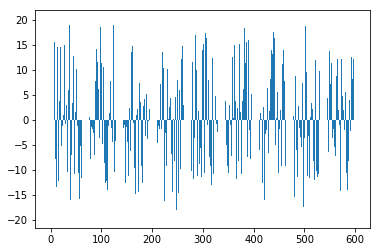

In [82]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
matrix=lr.coef_
w0=lr.intercept_
#print(matrix)
#all_bx=[]
#for line in X_test:
#    bx=w0+np.dot(line,matrix.T)
#    all_bx.append(bx)
bx=w0+np.dot(X_test, matrix.T)
#print(bx)
import matplotlib.pyplot as plt
plt.bar([n for n in range(len(bx))], bx)

Предсказание принимает значения от -20 до 20, при этом на вероятность принадлежности к классу это не очень похоже. 

Реализуйте сигмоиду и постройте её график. Что вы можете сказать об этой функции?

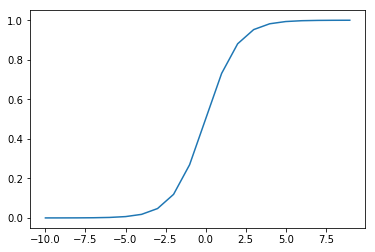

In [83]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import matplotlib.pyplot as plt
def sigmoida(arr):
    return 1/(1+(np.exp([-a for a in arr])))   
xs=[a for a in range (-10,10)]
plt.plot(xs, sigmoida(xs))

Область допустимых значений этой функции лежит на отрезке [0;1], а значит, функция удобна для интерпретации вероятностей.

Примените реализованную сигмоиду к $b(x)$. Вы должны получить вероятности принадлежности к положительному классу. Проверьте, что ваши значения совпали с теми, которые получены с помощью `predict_proba`.

In [85]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
res=sigmoida(bx)
#print(res[:20])
#print(needed_proba[:20])
aaa=[]
for r in range(len(res)):
    if res[r]==needed_proba[r]:
        aaa.append(res[r])
#aaa.sum(axis=0)
print(len(aaa))

600


Таким образом, обучение логистической регрессии — настройка параметров $w$ и $w_0$, а применение — подсчёт вероятностей принадлежности положительному классу как применение сигмоды к скалярному произведению признаков и параметров.

Постройте для обученной логистической регрессии ROC-кривую `roc_curve` и PR-кривую `precision_recall_curve`.

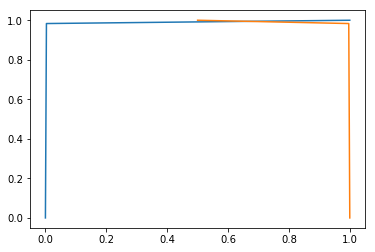

In [98]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
#from sklearn.metrics import metrics
from sklearn.metrics import roc_curve, precision_recall_curve, auc
#print(bin_pred)
#print(list(y_test))
fpr, tpr, thresholds = roc_curve(list(y_test), bin_pred)
#print(fpr)
#print(tpr)
#print(thresholds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr)
precision, recall, thresholds = precision_recall_curve(list(y_test), bin_pred)
#print(precision)
#print(recall)
#print(thresholds)
plt.plot(precision, recall)

### Бонусное задание. Обучение логистической регрессии.

[2 бонусных балла]

Если выше вручную мы только применяли логистическую регрессию, то здесь предлагается реализовать обучение с помощью полного градиентного спуска.

Если кратко, то обучение логистической регрессии с $L_2$-регуляризацией можно записать следующим образом:

$$
Q(w, X) = \frac{1}{l} \sum_{i=1}^{l} \log (1 + \exp(- y_i \langle w, x_i \rangle )) + \frac{\lambda_2}{2} \lVert w \rVert _2^2 \to \min_w
$$

Считаем, что $y_i \in \{-1, +1\}$, а нулевым признаком сделан единичный (то есть $w_0$ соответствует свободному члену). Искать $w$ будем с помощью градиентного спуска:

$$
w^{(k+1)} = w^{(k)} - \alpha \nabla_w Q(w, X)
$$

В случае полного градиентного спуска $\nabla_w Q(w, X)$ считается напрямую (как есть, то есть, используя все объекты выборки). Длину шага $\alpha > 0$ в рамках данного задания предлагается брать равной некоторой малой константе.

Градиент по объекту $x_i$ считается по следующей формуле:

$$
\nabla_w Q(w, x_i) = - \frac{y_i x_i}{1 + \exp(y_i \langle w, x_i \rangle)} + \lambda_2 w
$$

На самом деле неправильно регуляризировать свободный член $w_0$ (то есть при добавлении градиента для $w_0$ не надо учитывать слагаемое с $\lambda_2$). Но в рамках этого задания мы не обращаем на это внимания и работаем со всеми вектором весов одинаково. 

В качестве критерия останова необходимо использовать (одновременно):
- проверку на евклидовую норму разности весов на двух соседних итерациях (например, меньше некоторого малого числа порядка $10^{-6}$) — параметр tolerance
- достижение максимального числа итераций (например, 10000) — параметр max\_iter.

Инициализировать веса можно случайным образом или нулевым вектором.

Реализуйте обучение логистической регрессии. Для удобства ниже предоставлен прототип с необходимыми методами. В `loss_history` необходимо сохранять вычисленное на каждой итерации значение функции потерь. 

In [ ]:
from sklearn.base import BaseEstimator

class LogReg(BaseEstimator):
    def __init__(self, lambda_2=1.0, tolerance=1e-4, max_iter=1000, alpha=1e-3):
        """
        lambda_2: L2 regularization param
        tolerance: for stopping gradient descent
        max_iter: maximum number of steps in gradient descent
        alpha: learning rate
        """
        self.lambda_2 = lambda_2
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.alpha = alpha
        self.w = None
        self.loss_history = None
    
    def fit(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: self
        """
        self.loss_history = []
        
        pass
        
        return self
    
    def predict_proba(self, X):
        """
        X: np.array of shape (l, d)
        ---
        output: np.array of shape (l, 2) where
        first column has probabilities of -1
        second column has probabilities of +1
        """
        if self.w is None:
            raise Exception('Not trained yet')
        
        pass
    
    def calc_gradient(self, X, y):
        """
        X: np.array of shape (l, d) (l can be equal to 1 if stochastic)
        y: np.array of shape (l)
        ---
        output: np.array of shape (d)
        """
        pass

    def calc_loss(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: float 
        """ 
        pass

1. Примените логистическую регресиию на той же выборке.
2. Посчитайте качество по тем же метрикам.
3. Визуализируйте изменение значений функции потерь от номера итераций.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

## Часть 2. Случайные леса.

[6 баллов]

Случайный лес — алгоритм машинного обучения, представляющий собой бэггинг над решающими деревьями (усреднение ответов множества слабых алгоритмов) с 2 основными идеями:
- Использование подмножества признаков при построении каждого сплита дерева.
- Бутстрап обучающей выборки для построения каждого дерева (с повторениями).

В этом задании мы попробуем оценить пользу каждой из идей. Будем использовать ту же выборку с тем же разбиением на 2 части. Для начала обучите решающее дерево `DecisionTreeClassifier` из scikit-learn и посчитайте ROC-AUC и Accuracy (порог 0.5). Не забудьте зафикиксировать сид для построения дерева (несмотря на то, что в классической реализации никакой случайности нет, при большой глубине дерева может возникать неоднозначность в выборке признака в сплите). Используйте этот сид для всех заданий ниже.

In [6]:
from sklearn.metrics import roc_auc_score, accuracy_score

In [7]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
np.random.seed(113233)
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import ensemble
clf=DecisionTreeClassifier(max_depth=10)
clf.fit(X_train, y_train)
y_res_tree=clf.predict(X_test)
a=roc_auc_score(y_test, y_res_tree)
print('ROC-AUC score is: '+str(a))
b=accuracy_score(y_test, y_res_tree)
print('Accuracy is equal to '+ str(b))

ROC-AUC score is: 0.963333333333
Accuracy is equal to 0.963333333333


In [20]:
print(len(X_train))

1400


### 2.1 Бэггинг классификаторов

Реализуйте бэггинг над решающими деревьями (усреднение предсказанных вероятностей всего ансамбля). 
В качестве основы используйте всё тот же `DecisionTreeClassifier`. Количество базовых алгоритмов предлагается брать равным 100. 

Посчитайте качество с помощью тех же метрик. Ответьте на следующие вопросы:
- Что интересного вы видите?
- С чем это связано?

In [8]:
import pandas as pd
X_train_df=pd.DataFrame(data=X_train)
y_train_df=pd.DataFrame(data=y_train)
X_test_df=pd.DataFrame(data=X_test)
y_test_df=pd.DataFrame(data=y_test)
print(len(X_train_df))

1400


In [86]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
#X_train=
res = np.zeros(len(X_test_df))
#print(len(res))
clf=DecisionTreeClassifier(random_state=42)
for i in range(100):
    #ind = np.random.choice(np.arange(1400), size=1400, replace=True)
    #print(ind)
    #print(len(ind))
    clf.fit(X_train_df, y_train_df)
    res += clf.predict(X_test_df)
#print(res)
prob = res / 100.0
#print(len(res))
print(roc_auc_score(y_test, res))
print(accuracy_score(y_test, prob > 0.5))
#np.mean(target.iloc[700:] == (res > 500))

0.968333333333
0.968333333333


результаты метрик немного улучшились. Это может быть связано с тем, что из-за усреднения маловозможные неправильные деревья "гасятся" большинством правильных.

### 2.2 Сэмплирование обучающей выборки

Добавим к нашему бэггингу бутстрап выборки (генерация случайной выборки того же размера с возвращением). Для этого может пригодиться `numpy.random.randint`.

Посчитайте качество. Что вы видите?

In [ ]:
DecisionTreeClassifier()

In [66]:
np.random.seed(123)  # для одинакового бутстрапа в каждом запуске
res = np.zeros(len(X_test_df))
#print(res)
for i in range(100):
    ind = np.random.choice(np.arange(1400), size=1400, replace=True)
    #print(ind)
    #print(len(ind))
    clf.fit(X_train_df.iloc[ind], y_train_df.iloc[ind])
    res += clf.predict(X_test_df)
probs= res / 100.0
#print(probs)
#print(res)
#print(len(res))
print('ROC-AUC = '+str(roc_auc_score(y_test, res)))
print('Accuracy = '+str(accuracy_score(y_test, probs>0.5)))
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

ROC-AUC = 0.992761111111
Accuracy = 0.95


качество ROC-AUC повысилось.

### 2.3 Выбор случайного подмножества признаков

Временно забудем о бутстрапе выборки и добавим выбор случайного подмножества признаков при построении каждого сплита. В `DecisionTreeClassifier` за это отвечает параметр `max_features`. По умолчанию он имеет значение `None`, что обозначает использование всех возможных признаков. Для задачи классификации рекоменуется использовать квадратный корень от количества признаков. Попробуйте выставить такое значение. На этот раз надо отключить фиксированный сид в построении дерева, так как иначе каждый раз мы будем выбирать одинаковые подмножества признаков. 

Посчитайте качество. Что вы видите?

In [88]:
np.random.seed(123)  # для воспроизводимости построения случайных подмножеств признаков
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble
res=np.zeros(len(X_test_df))
for i in range(100):
    clf_r = DecisionTreeClassifier(max_depth=100, max_features='sqrt', random_state=None)
    clf_r.fit(X_train, y_train)
    res += clf.predict(X_test_df)
probs= res / 100.0

#clf_r = DecisionTreeClassifier(1000, max_depth=10, max_features=5)
#clf_r.fit(X_train, y_train)
#a=clf_r.predict(X_test)
#print(a)
#np.mean(y_test==clf_r.predict(X_test))
#print(res)
#print(probs)
print('ROC-AUC is '+str(roc_auc_score(y_test, res)))
print('Accuracy is '+str(accuracy_score(y_test,probs>0.5)))
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

ROC-AUC is 0.968333333333
Accuracy is 0.968333333333


Значения обеих метрик упали по сравнению с бэггингом, но лучше единичного дерева.

### 2.4 = 2.2 + 2.3

Объединим два подхода (бутстрап + выбор подмножества признаков). Получим случайный лес.

Посчитайте качество. Что вы видите?

In [89]:
np.random.seed(123)  # для одинакового бутстрапа и выбора подмножеств признаков в каждом запуске
res = np.zeros(len(X_test_df))
#print(res)
clf=DecisionTreeClassifier(max_features=5, random_state=42)
for i in range(100):
    ind = np.random.choice(np.arange(1400), size=1400, replace=True)
    #print(ind)
    #print(len(ind))
    clf.fit(X_train_df.iloc[ind], y_train_df.iloc[ind])
    res += clf.predict(X_test_df)
probs=res/100.0
#print(y_test)
#print(res)
#print(len(res))
print('ROC-AUC = '+str(roc_auc_score(y_test, res)))
print('Accuracy = '+str(accuracy_score(y_test, probs>0.5)))
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

ROC-AUC = 0.992761111111
Accuracy = 0.95


значение метрики ROC-AUC - наилучшее из всех, которые были разобраны.

То, что мы сделали уже реализовано в `RandomForestClassifier`. Попробуйте воспользоваться им. Количество используемых деревьев передаётся в параметре `n_estimators`.

Посчитайте качество. Что вы видите?

In [93]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import sklearn
from sklearn import ensemble
clf_r2 = sklearn.ensemble.RandomForestClassifier(n_estimators=100, max_depth=10, max_features=5, bootstrap=True)
clf_r2.fit(X_train, y_train)
print('ROC-AUC is '+str(roc_auc_score(clf_r2.predict(X_test),y_test)))
print('Accuracy is '+str(accuracy_score(y_test,clf_r2.predict(X_test))))

ROC-AUC is 0.966749644381
Accuracy is 0.966666666667


Метрика ROC-AUC немного упала, зато увеличилась Accuracy. Результаты отличны от результатов, полученных ручной обработкой датасета через задание деревьев.

### 2.5 Влияние количества используемых деревьев в случайном лесе

Один из параметров случайного леса — количество деревьев, используемых в бэггинге. Оценим, как влияет этот параметр на финальное качество. Для этого обучите случайные леса с разным количество деревьев (например, перебирайте от 10 до 1000 с шагом в 10), оцените качество с помощью ROC-AUC. Постройте график зависимости ROC-AUC от количества используемых деревьев. Что вы видите?

In [95]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
n_grid=[a for a in range(10,1000,10)]
res=np.zeros(len(X_test_df))
all_roc_aucs=[]
for n in n_grid:
    forest=sklearn.ensemble.RandomForestClassifier(n)
    forest.fit(X_train_df, y_train_df)
    res += forest.predict(X_test_df)
    probs_for_n=forest.predict(X_test_df)
    roc_auc=roc_auc_score(y_test, probs_for_n)
    all_roc_aucs.append(roc_auc)
probs=res/100.0
#print(res)
print('ROC-AUC = '+str(roc_auc_score(y_test, res)))
print('Accuracy = '+str(accuracy_score(y_test, probs>0.5)))

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykerne

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykerne

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykerne

ROC-AUC = 0.980244444444
Accuracy = 0.951666666667


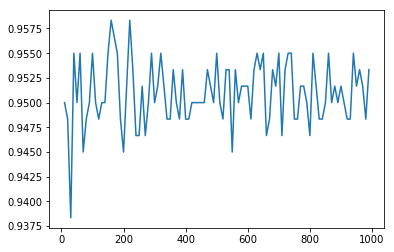

In [94]:
#print(n_grid)
#print(all_roc_aucs)
plt.plot(n_grid, all_roc_aucs)
plt.show()

Максимум наблюдается при количестве деревьев, близкому к 200 (около 0.975), дальше все значения roc-auc лежат в промежутке между 0.945  и 0.955.

### 2.6 Важность признаков

Случайный лес позволяет оценить важность признаков. У обученного случайного леса есть аттрибут `feature_importances_`, где храниться важность для каждого признака. Постройте `barplot` с важностью признаков (удобно использовать библиотеку `seaborn`, где можно для каждого столбца передать название признака `train.columns`).

[ 0.05612961  0.00365069  0.01825402  0.00401717  0.0146169   0.00338027
  0.02081321  0.01537469  0.02436347  0.01384857  0.01672034  0.03821987
  0.04120612  0.66784036  0.01645083  0.0172614   0.01697814  0.00276804
  0.00452687  0.00357942]


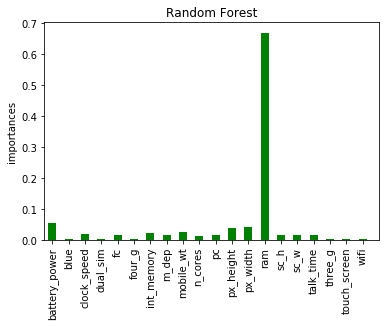

In [51]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

importances = forest.feature_importances_ 
print(importances)
plt.bar(range(X_train.shape[1]), importances, 0.5, color='g')
plt.xticks(rotation=90)
plt.xlim([-0.5, X_train.shape[1] ])
plt.xticks(range( X_train.shape[1]), X_train.columns)
plt.ylabel('importances')
plt.title('Random Forest')

## Выводы

Напишите, что интересного вы узнали в этой работе, в каких экспериментах какие результаты получились.

- В целом, применение большого количества разных деревьев лучше, чем одно дерево или усреднение одинаковых
- Исходя из этого датасета, случайный лес лучше строить не из большого количества деревьев, а из усреднения деревьев с разными выборками и признаками
- сигмоида позволяет лучше понять, к какому классу относится объект, чем логистическая регрессия сама по себе